In [7]:
#Importing packages
# Installing Packages
install.packages("ClusterR",repos='http://cran.us.r-project.org')
install.packages("cluster",repos='http://cran.us.r-project.org')
  
# Loading package
library("ClusterR")
library("cluster")

also installing the dependencies ‘gtools’, ‘gmp’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: gtools



In [1]:
#Importing Dataset
irisData=read.csv('Iris.csv',header=TRUE)

In [2]:
#Data Preprocessing
print(dim(irisData))
str(irisData)
head(irisData)
summary(irisData)
Species = irisData$Species
print(head(Species))
irisData=irisData[,-c(1,6)] #Remove non-numeric data
print(head(irisData))

[1] 150   6
'data.frame':	150 obs. of  6 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : Factor w/ 3 levels "Iris-setosa",..: 1 1 1 1 1 1 1 1 1 1 ...


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa


       Id         SepalLengthCm    SepalWidthCm   PetalLengthCm  
 Min.   :  1.00   Min.   :4.300   Min.   :2.000   Min.   :1.000  
 1st Qu.: 38.25   1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600  
 Median : 75.50   Median :5.800   Median :3.000   Median :4.350  
 Mean   : 75.50   Mean   :5.843   Mean   :3.054   Mean   :3.759  
 3rd Qu.:112.75   3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100  
 Max.   :150.00   Max.   :7.900   Max.   :4.400   Max.   :6.900  
  PetalWidthCm              Species  
 Min.   :0.100   Iris-setosa    :50  
 1st Qu.:0.300   Iris-versicolor:50  
 Median :1.300   Iris-virginica :50  
 Mean   :1.199                       
 3rd Qu.:1.800                       
 Max.   :2.500                       

[1] Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa Iris-setosa
Levels: Iris-setosa Iris-versicolor Iris-virginica
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1           5.1          3.5           1.4          0.2
2           4.9          3.0           1.4          0.2
3           4.7          3.2           1.3          0.2
4           4.6          3.1           1.5          0.2
5           5.0          3.6           1.4          0.2
6           5.4          3.9           1.7          0.4


 [1] 152.36871 142.85159  57.31787  49.75040  43.57421  36.81647  36.25348
 [8]  34.77505  26.29771  27.51464  24.88133  24.76323  22.45038  20.63090


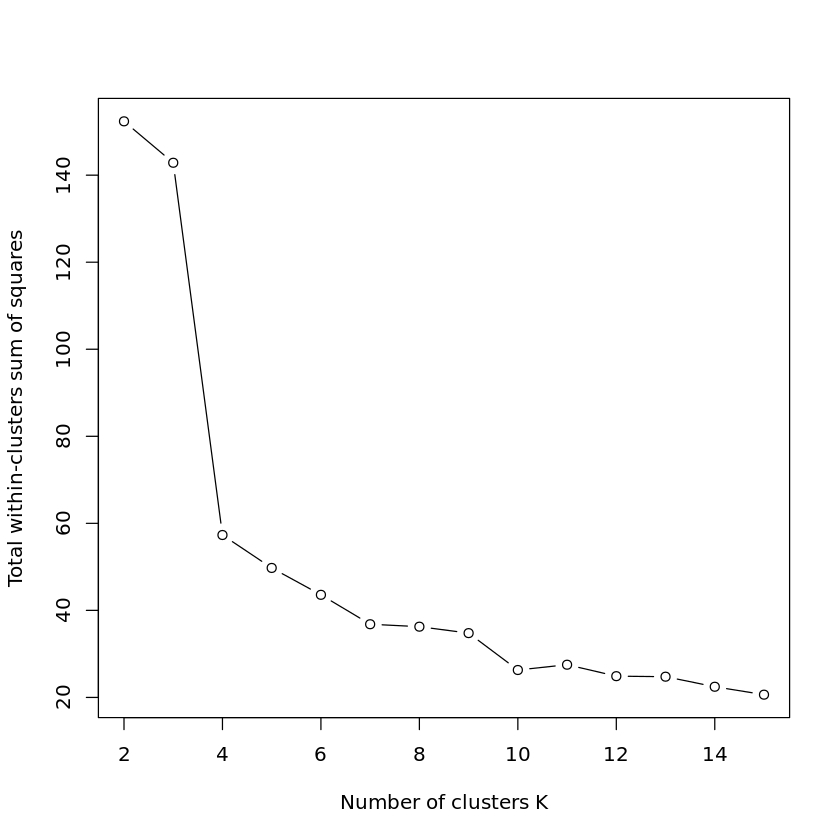

In [3]:
#finding Optimal cluster using elbow method
k.values = 2:15
wss = c()
for(i in k.values){
  res = kmeans(irisData,centers=i,iter.max = 10)$tot.withinss
  wss = append(wss,res)
}
print(wss)
plot(k.values, wss,type="b",
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [4]:
#Results say that k=3 is optimum number of centers
kmeans.res = kmeans(irisData,centers=3,iter.max = 10)
print(kmeans.res)
clusters = kmeans.res$cluster
print(clusters)
centers = kmeans.res$centers
print(centers)

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.901613     2.748387      4.393548     1.433871
2      5.006000     3.418000      1.464000     0.244000
3      6.850000     3.073684      5.742105     2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.24040 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [6]:
#Confusion Matrix
confusionmatrix <- table(Species, kmeans.res$cluster)
print(confusionmatrix)

                 
Species            1  2  3
  Iris-setosa      0 50  0
  Iris-versicolor 48  0  2
  Iris-virginica  14  0 36


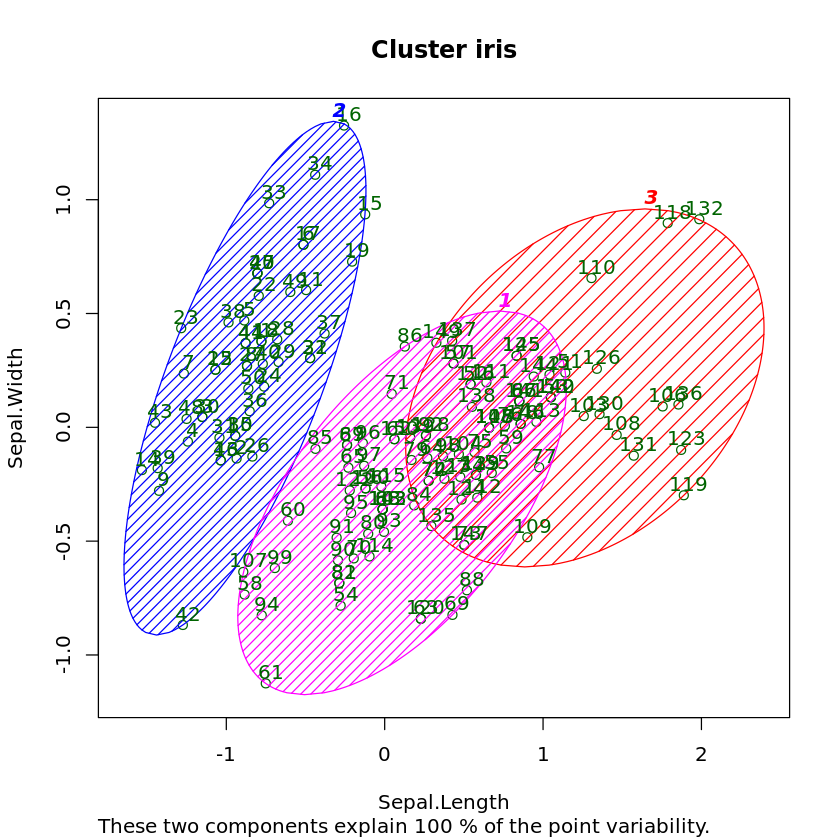

In [9]:
#plotting clusters
y <- kmeans.res$cluster
clusplot(iris[, c("Sepal.Length", "Sepal.Width")],
         y,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste("Cluster iris"),
         xlab = 'Sepal.Length',
         ylab = 'Sepal.Width')